In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

Logistic regression is used as a baseline model, which works well for binary classification. Furthermore, the dataset has a balanced amount of positive and negative sentiments to predict, which is beneficial for logistic regression. However, it does not work directly on the textual data but through counts and the model assumes a linear relationship.

In [11]:
df = pd.read_csv('CleanedTweets.csv')
df.head()  # Display first few rows

,Unnamed: 0,sentiment,text,mentions,hashtags,urls,exclamations,emoticons,ellipsis,word_count,processed_text
0,0,0,"- awww, that's a bummer. you shoulda got da...",1,0,1,0,1,0,19,"- awww , bummer . shoulda got david carr third..."
1,1,0,is upset that he can't update his facebook by ...,0,0,0,1,0,1,21,is upset can't update facebook texting ... mig...
2,2,0,i dived many times for the ball. managed to s...,1,0,0,0,0,0,18,dived many time ball . managed save 50 % rest ...
3,3,0,my whole body feels itchy and like its on fire,0,0,0,0,0,0,10,whole body feel itchy like fire
4,4,0,"no, it's not behaving at all. i'm mad. why am...",1,0,0,0,0,0,21,"no , not behaving . mad . ? can't see ."


In [12]:
def odd_char(text):
    letters_only = re.sub(r'[^A-Za-z]', '', text)
    return len(text)-len(letters_only) #length of text- english letters
df['odd_count'] = df['text'].apply(lambda x: odd_char(str(x)))
print(df['odd_count'])

0        25
1        27
2        22
3        10
4        29
         ..
99995    14
99996    23
99997    11
99998    29
99999    22
Name: odd_count, Length: 100000, dtype: int64


In [13]:
xvals=df[['mentions', 'hashtags', 'urls', 'exclamations', 'emoticons', 'ellipsis', 'word_count', 'odd_count']]
yvals=df['sentiment']

xtrain, xtest, ytrain, ytest=train_test_split(xvals, yvals, test_size=0.25, random_state=0)

std_x=StandardScaler()
xtrain=std_x.fit_transform(xtrain)
xtest=std_x.transform(xtest)

classifier=LogisticRegression() 
classifier.fit(xtrain, ytrain)
y_pred=classifier.predict(xtest)

cm=confusion_matrix(ytest,y_pred)
print(cm)

print("Accuracy:", accuracy_score(ytest, y_pred))

[[7755 4706]
 [5077 7462]]
Accuracy: 0.60868


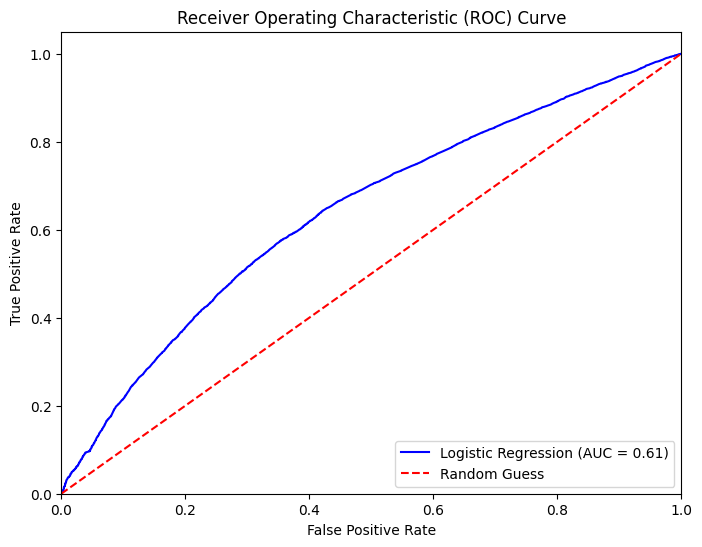

In [14]:

logit_roc_auc = roc_auc_score(ytest, classifier.predict(xtest))

# getting the roc curve for fpr and tpr
fpr, tpr, thresholds = roc_curve(ytest, classifier.predict_proba(xtest)[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc, color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()